# Direct Comparison Control T0 v T2
Collab Theis - Hebrok labs

Data analysis: Alexander Fastner

based on Data analysis by: Sara Jimenez

Data generation: Veronica Cochrane

## Loading Packages

In [1]:
import scanpy as sc
import decoupler as dc

# Only needed for processing
import numpy as np
import pandas as pd
import anndata as ad
from anndata import AnnData
from scipy.stats import pearsonr, spearmanr


## Load Data

In [2]:
# Read raw data and process it
adata = pd.read_csv('../data/MAFA_WT_gene_count.txt', index_col=20, sep='\t').T
adata

gene_name,CHGA,MT-CO1,GCG,INS,MT-ND4,EEF1A1,MT-ND5,TTR,MT-CO2,MT-CYB,...,RNA5-8SN4,AL354822.1,AC023491.2,RF00003,RF01972,RF01973,RF01974,AC233755.2,AC233755.1,AC213203.1
MAFAWT_001,769950,469036,398234,164748,186078,116719,151341,178909,133640,121061,...,0,0,0,0,0,0,0,0,0,0
MAFAWT_002,760265,204988,207026,146662,80616,98010,70795,109150,55131,49581,...,0,0,0,0,0,0,0,0,0,0
MAFAWT_003,672585,522418,378290,146501,243656,93180,195788,131732,163870,158054,...,0,0,0,0,0,0,0,0,0,0
MAFAWT_004,820162,262856,502891,171062,117809,132909,97752,150350,79653,75222,...,0,0,0,0,0,0,0,0,0,0
MAFAWT_005,878886,335731,73413,123677,122960,127821,102340,30019,96654,85530,...,0,0,0,0,0,0,0,0,0,0
MAFAWT_006,878745,350758,114376,147449,134333,125976,105483,31916,99623,94874,...,0,0,0,0,0,0,0,0,0,0
MAFAWT_007,1129979,359712,159369,65313,156749,104854,156351,25998,108889,113709,...,0,0,0,0,0,0,0,0,0,0
MAFAWT_008,1017468,285966,157747,109003,111200,119484,89777,32111,89609,81167,...,0,0,0,0,0,0,0,0,0,0
MAFAWT_009,800671,176313,194431,139982,64275,101077,52585,53031,49169,39752,...,0,0,0,0,0,0,0,0,0,0
MAFAWT_010,633710,177343,219577,113536,73264,76057,64194,57478,50504,46106,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Transform to AnnData object
adata = AnnData(adata, dtype=np.float32)
adata.var_names_make_unique()
adata

/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 20 × 58735

In [4]:
# Read metadata 
metadata = pd.read_csv('../data/2023_MAFA_MetaData.txt', index_col=0, sep='\t')
metadata

,Sample_Description,Treatment,Genotype,TimePoint,Batch,DOX,GroupName
SampleID,,,,,,,
MAFAWT_001,MAFAWT,MAFA,WT,T0,1,N,MAFA_WT_T0
MAFAWT_002,MAFAWT,MAFA,WT,T0,1,N,MAFA_WT_T0
MAFAWT_003,MAFAWT,MAFA,WT,T0,1,N,MAFA_WT_T0
MAFAWT_004,MAFAWT,MAFA,WT,T0,1,N,MAFA_WT_T0
MAFAWT_005,MAFAWT,MAFA,WT,T2,1,Y,MAFA_WT_T2
MAFAWT_006,MAFAWT,MAFA,WT,T2,1,Y,MAFA_WT_T2
MAFAWT_007,MAFAWT,MAFA,WT,T2,1,Y,MAFA_WT_T2
MAFAWT_008,MAFAWT,MAFA,WT,T2,1,Y,MAFA_WT_T2
MAFAWT_009,MAFAWT,MAFA,WT,T1,1,Y,MAFA_WT_T1


In [5]:
adata.obs['condition'] = metadata['Treatment']
adata.obs['time_point'] = metadata['TimePoint']
adata.obs['DOX'] = metadata['DOX']
adata.obs

,condition,time_point,DOX
MAFAWT_001,MAFA,T0,N
MAFAWT_002,MAFA,T0,N
MAFAWT_003,MAFA,T0,N
MAFAWT_004,MAFA,T0,N
MAFAWT_005,MAFA,T2,Y
MAFAWT_006,MAFA,T2,Y
MAFAWT_007,MAFA,T2,Y
MAFAWT_008,MAFA,T2,Y
MAFAWT_009,MAFA,T1,Y
MAFAWT_010,MAFA,T1,Y


In [6]:
# split data set by timepoint
subset_t0 = adata[adata.obs.time_point == 'T0']
subset_t2 = adata[adata.obs.time_point == 'T2']
#split by condition to remove control
subset_t0 = subset_t0[subset_t0.obs.condition == "Control"]
subset_t2 = subset_t2[subset_t2.obs.condition == "Control"]
subset_t2.obs['condition'] = subset_t2.obs['condition'].astype(str) + '_T2'
#rename T0 to control
#subset_t0.obs.condition = "Control"
#modify to add _wt/mut to condition to seperate
adata = ad.concat([subset_t0, subset_t2], axis=0)
adata.obs

/tmp/ipykernel_14073/1847515531.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  subset_t2.obs['condition'] = subset_t2.obs['condition'].astype(str) + '_T2'


,condition,time_point,DOX
MAFAWT_012,Control,T0,N
MAFAWT_013,Control,T0,N
MAFAWT_014,Control,T0,N
MAFAWT_015,Control_T2,T2,Y
MAFAWT_016,Control_T2,T2,Y
MAFAWT_017,Control_T2,T2,Y


## Quality Control

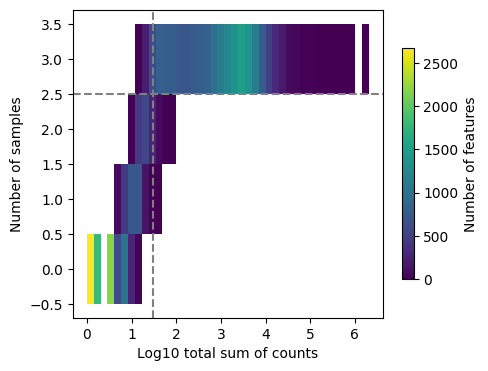

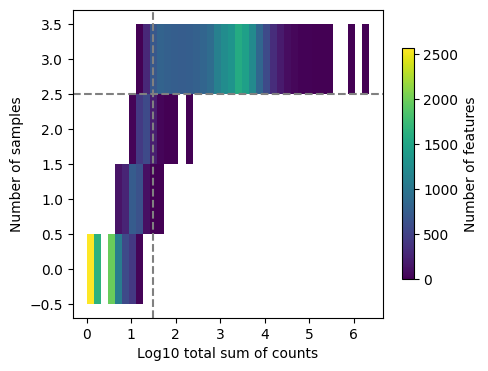

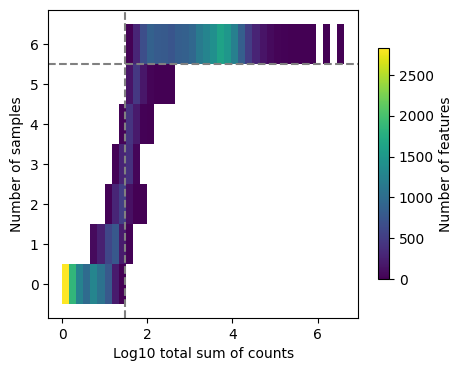

In [7]:
#check various filter points
dc.plot_filter_by_expr(subset_t0, group=None, min_count=5, min_total_count=30, large_n=10, min_prop=0.75)
dc.plot_filter_by_expr(subset_t2, group=None, min_count=5, min_total_count=30, large_n=10, min_prop=0.75)
dc.plot_filter_by_expr(adata, group=None, min_count=5, min_total_count=30, large_n=10, min_prop=0.75)

In [8]:
# Obtain genes that pass the thresholds
genes = dc.filter_by_expr(adata, group=None, min_count=10, min_total_count=15, large_n=1, min_prop=1)
genes.size

15620

In [9]:
# Filter by these genes
adata = adata[:, genes].copy()
adata

AnnData object with n_obs × n_vars = 6 × 15620
    obs: 'condition', 'time_point', 'DOX'

In [10]:
#!pip install pydeseq2

In [11]:
# Import DESeq2
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [12]:
adata.X = np.round(adata.X,0)
#adata.obs.condition

In [13]:
# Build DESeq2 object
dds = DeseqDataSet(
    adata=adata,
    design_factors='condition',
    refit_cooks=True,
    n_cpus=8,
)

/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/pydeseq2/dds.py:257: UserWarning: Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
  self.obsm["design_matrix"] = build_design_matrix(


In [14]:
# Compute LFCs
dds.deseq2()

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.68 seconds.

Fitting dispersion trend curve...
... done in 3.93 seconds.

Fitting MAP dispersions...
... done in 20.28 seconds.

Fitting LFCs...
... done in 1.80 seconds.

Refitting 0 outliers.



In [15]:
# Extract contrast 
stat_res = DeseqStats(dds, contrast=['condition', 'Control-T2', 'Control'], n_cpus=8)

In [16]:
# Compute Wald test
stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: condition Control-T2 vs Control


... done in 0.99 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
CHGA,696668.812500,0.134030,0.057055,2.349129,0.018817,0.654623
MT-CO1,249625.890625,0.266056,0.291182,0.913712,0.360868,0.999937
GCG,311617.968750,0.129254,0.268985,0.480524,0.630855,0.999937
INS,118543.835938,-0.164655,0.125878,-1.308051,0.190856,0.999937
MT-ND4,109761.023438,0.276355,0.216102,1.278819,0.200961,0.999937
...,...,...,...,...,...,...
ZNF135,19.842314,0.098176,0.450815,0.217774,0.827605,0.999937
GRM7,13.807706,-0.216557,0.497544,-0.435252,0.663380,NaN
AC008696.2,16.997797,0.170851,0.482387,0.354178,0.723206,NaN


In [17]:
# Shrink LFCs
stat_res.lfc_shrink(coeff='condition_Control-T2_vs_Control')

Fitting MAP LFCs...
/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/pydeseq2/utils.py:1220: RuntimeWarning: overflow encountered in exp
  counts - (counts + size) / (1 + size * np.exp(-xbeta - offset))


Shrunk log2 fold change & Wald test p-value: condition Control-T2 vs Control


... done in 5.08 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
CHGA,696668.812500,-0.466285,0.060176,2.349129,0.018817,0.654623
MT-CO1,249625.890625,3.634829,0.494917,0.913712,0.360868,0.999937
GCG,311617.968750,4.307697,0.544812,0.480524,0.630855,0.999937
INS,118543.835938,-0.337586,0.136215,-1.308051,0.190856,0.999937
MT-ND4,109761.023438,0.351612,0.290337,1.278819,0.200961,0.999937
...,...,...,...,...,...,...
ZNF135,19.842314,0.000378,0.039572,0.217774,0.827605,0.999937
GRM7,13.807706,-0.000672,0.038190,-0.435252,0.663380,NaN
AC008696.2,16.997797,0.000567,0.039721,0.354178,0.723206,NaN


In [18]:
# Extract results
results_df = stat_res.results_df
results_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
CHGA,696668.812500,-0.466285,0.060176,2.349129,0.018817,0.654623
MT-CO1,249625.890625,3.634829,0.494917,0.913712,0.360868,0.999937
GCG,311617.968750,4.307697,0.544812,0.480524,0.630855,0.999937
INS,118543.835938,-0.337586,0.136215,-1.308051,0.190856,0.999937
MT-ND4,109761.023438,0.351612,0.290337,1.278819,0.200961,0.999937
...,...,...,...,...,...,...
ZNF135,19.842314,0.000378,0.039572,0.217774,0.827605,0.999937
GRM7,13.807706,-0.000672,0.038190,-0.435252,0.663380,NaN
AC008696.2,16.997797,0.000567,0.039721,0.354178,0.723206,NaN


In [19]:
#!pip install adjustText

In [20]:
#get the table of the top 20 pvalues from results_df
top_20_pvalues = results_df.sort_values('log2FoldChange', ascending=False).head(20)
top_20_pvalues

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
GCG,311617.968750,4.307697,0.544812,0.480524,6.308546e-01,0.999937
MT-CO1,249625.890625,3.634829,0.494917,0.913712,3.608683e-01,0.999937
AC090589.3,24.153053,1.335707,0.355788,4.333590,1.466972e-05,0.011426
AL590867.2,37.794857,1.140918,0.361579,3.880101,1.044130e-04,0.040058
SPEF1,54.582001,0.857711,0.472130,3.019663,2.530561e-03,0.261732
VDAC1P1,28.845129,0.753519,0.339489,3.215036,1.304281e-03,0.186228
LINC01933,44.988483,0.727367,0.207985,4.135618,3.540014e-05,0.018778
SNHG4,51.144001,0.669812,0.231559,3.681563,2.318088e-04,0.069620
SLC25A5-AS1,56.297771,0.609020,0.351903,2.979513,2.887067e-03,0.281664


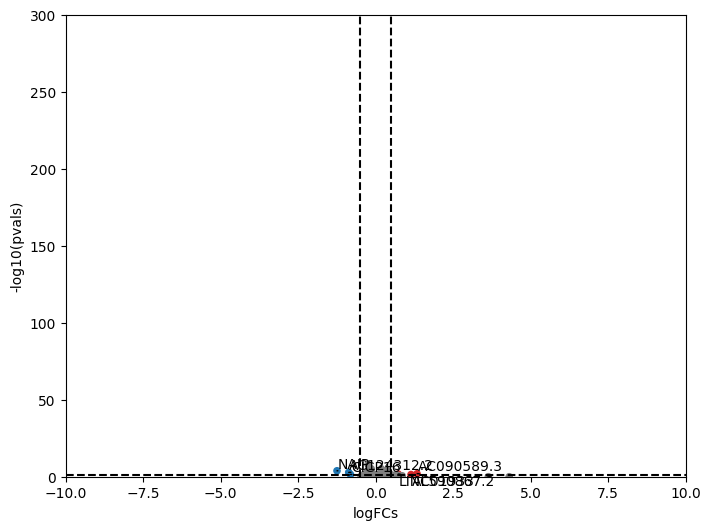

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
dc.plot_volcano_df(
    results_df,
    x='log2FoldChange',
    y='padj',
    top=20,
    ax=ax
)
ax.set_xlim(-10, 10)
ax.set_ylim(0, 300)
plt.savefig('../figures/direct/Control_WT_02/volcano.png')

In [22]:
mat = results_df[['stat']].T.rename(index={'stat': 'treatment.vs.control'})
mat

gene_name,CHGA,MT-CO1,GCG,INS,MT-ND4,EEF1A1,MT-ND5,TTR,MT-CO2,MT-CYB,...,AC105749.1,ANXA2R,AC254633.1,PCGEM1,ADAMTS12,ZNF135,GRM7,AC008696.2,FOXD2-AS1,LINC01338
treatment.vs.control,2.349129,0.913712,0.480524,-1.308051,1.278819,0.055712,0.776639,1.188871,1.144306,1.375404,...,-0.316399,0.257187,-0.28162,0.013861,-0.227365,0.217774,-0.435252,0.354178,0.274707,-0.419613


### Transcription factor activity inference

In [23]:
collectri = pd.read_csv("collectri.csv")
collectri

,source,target,weight,PMID
0,MYC,TERT,1,10022128;10491298;10606235;10637317;10723141;1...
1,SPI1,BGLAP,1,10022617
2,SMAD3,JUN,1,10022869;12374795
3,SMAD4,JUN,1,10022869;12374795
4,STAT5A,IL2,1,10022878;11435608;17182565;17911616;22854263;2...
...,...,...,...,...
43173,NFKB,hsa-miR-143-3p,1,19472311
43174,AP1,hsa-miR-206,1,19721712
43175,NFKB,hsa-miR-21-5p,1,20813833;22387281
43176,NFKB,hsa-miR-224-5p,1,23474441;23988648


# Filter new Table by the LFC and adjpvalue from DE table above

In [24]:
# Infer TF activities with ulm
tf_acts, tf_pvals = dc.run_ulm(mat=mat, net=collectri, verbose=True)
#make copy to make table from
table_tf_acts = tf_acts
table_tf_pvals = tf_pvals
table_tf_acts = table_tf_acts.rename(index={"treatment.vs.control": "TF_Activity"})
table_tf_pvals = table_tf_pvals.rename(index={"treatment.vs.control": "TF_pvalue"})
new_table = pd.concat([table_tf_acts, table_tf_pvals], axis = 0).T
#actual df
tf_acts

selected_rows = results_df.loc[[idx for idx in new_table.index if idx in results_df.index]]
selected_rows

Running ulm on mat with 1 samples and 15620 targets for 650 sources.


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
ABL1,4022.702148,-0.003893,0.037311,-0.606242,0.544354,0.999937
AHR,2284.247070,-0.003229,0.037346,-0.526163,0.598775,0.999937
AHRR,172.969406,-0.002704,0.037527,-1.027280,0.304289,0.999937
AIP,900.335754,0.000024,0.037784,0.001714,0.998632,0.999937
APEX1,2573.847900,0.069544,0.048233,2.514134,0.011932,0.566470
...,...,...,...,...,...,...
ZNF395,620.991272,0.001738,0.037352,0.271365,0.786110,0.999937
ZNF436,328.777802,-0.001043,0.038223,-0.424441,0.671244,0.999937
ZNF699,100.783104,-0.001165,0.037846,-0.242024,0.808761,0.999937


In [25]:
# make selectable for various threshold values
Threshold_LFC = 0.1
Threshold_padj = 0.2
subset_lfc = selected_rows[abs(selected_rows["log2FoldChange"]) > Threshold_LFC]
subset_lfc

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
ATOH7,17.294876,-0.144270,0.157521,0.164892,0.869029,NaN
BHLHA15,40.698181,-0.144270,0.157521,2.604925,0.009189,0.517054
ELF1,615.405640,-0.148023,0.052193,-3.657431,0.000255,0.073624
ELF3,573.519592,-0.136718,0.069474,-3.014959,0.002570,0.261732
EWSR1,3282.832031,0.141389,0.045973,3.767882,0.000165,0.053655
GABPA,629.239807,-0.144270,0.157521,-2.748245,0.005992,0.437011
HDAC7,122.494164,-0.144270,0.157521,-2.096872,0.036005,0.831761
JUND,3876.893799,0.155378,0.052789,3.703797,0.000212,0.065066
KAT5,316.443298,0.193465,0.074256,3.448982,0.000563,0.118068


In [26]:
subset_padj = subset_lfc[abs(subset_lfc["padj"]) < Threshold_padj]
subset_padj

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
ELF1,615.405640,-0.148023,0.052193,-3.657431,0.000255,0.073624
EWSR1,3282.832031,0.141389,0.045973,3.767882,0.000165,0.053655
JUND,3876.893799,0.155378,0.052789,3.703797,0.000212,0.065066
KAT5,316.443298,0.193465,0.074256,3.448982,0.000563,0.118068


In [27]:
#get TF data too
tf_data = new_table.loc[subset_padj.index]
tf_data
#merge into 1 for readability
complete_table = pd.merge(tf_data, subset_padj, left_index=True, right_index=True)
complete_table
#save
complete_table.to_csv('../figures/direct/Control_WT_02/table_comparison_Control_WT_02.csv')

### Activity inference with Univariate Linear Model (ULM)

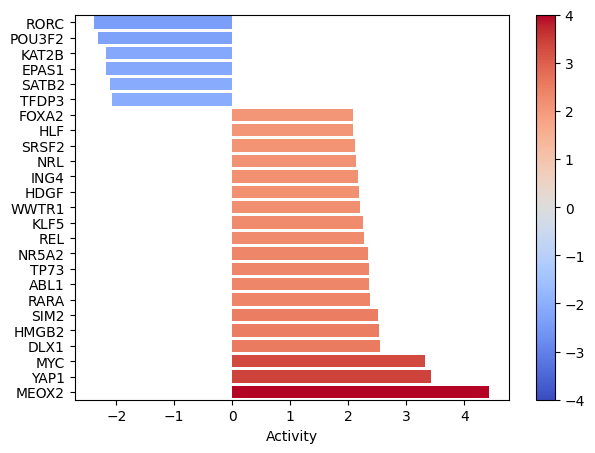

In [28]:
dc.plot_barplot(
    tf_acts,
    'treatment.vs.control',
    top=25,
    vertical=True,
    vmin=4,
    vmax=4,
    save='../figures/direct/Control_WT_02/tf_activities.png'
)

In [29]:
abs_values = tf_acts.abs()
sorted_df = abs_values.sum(axis=0).sort_values(ascending=False)
top_25 = sorted_df.head(25).index
subset_df = tf_acts[top_25]
long_df = subset_df.reset_index().melt(var_name='TFs', value_name='value')
long_df = long_df[long_df.index != 0]
long_df.to_csv('../figures/direct/Control_WT_02/top25_tfs.csv')
long_df

,TFs,value
1,MEOX2,4.42487
2,YAP1,3.435216
3,MYC,3.330239
4,DLX1,2.539804
5,HMGB2,2.523858
6,SIM2,2.507602
7,RARA,2.37944
8,RORC,-2.377545
9,ABL1,2.356709
10,TP73,2.354609


# TF Activity with MLM

In [30]:
tf_acts_MLM, tf_pvals_MLM, = dc.run_mlm(mat=mat, net=collectri, verbose=True)
tf_acts_MLM

Running mlm on mat with 1 samples and 15620 targets for 650 sources.


,ABL1,AHR,AHRR,AIP,AIRE,AP1,APEX1,AR,ARID1A,ARID3A,...,ZNF354C,ZNF362,ZNF382,ZNF384,ZNF395,ZNF436,ZNF699,ZNF76,ZNF804A,ZNF91
treatment.vs.control,0.74025,-0.619558,-0.287687,0.637423,0.745889,0.240826,1.616521,-0.883925,-1.36845,-0.738754,...,-0.923007,1.684376,1.1745,-0.357753,-1.054681,2.002864,-0.803356,0.639555,-0.686492,0.880888


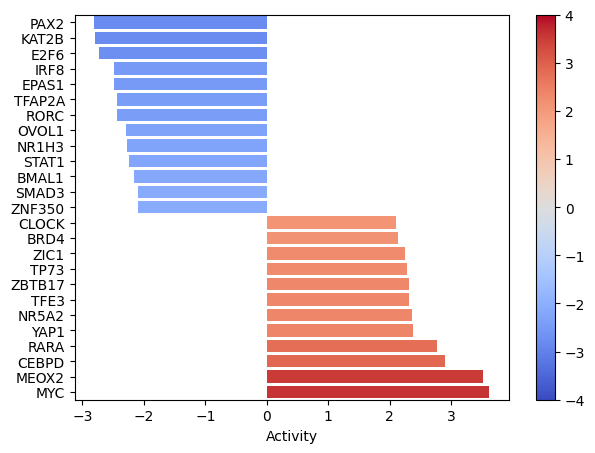

In [31]:
dc.plot_barplot(
    tf_acts_MLM,
    'treatment.vs.control',
    top=25,
    vertical=True,
    vmin=4,
    vmax=4,
    save='../figures/direct/Control_WT_02/T02_tf_activities_MLM.png'
)

# Compare ULM and MLM results correlations

In [32]:
pearson_r, pearson_p = pearsonr(tf_acts.values.flatten(), tf_acts_MLM.values.flatten())
spearman_r, spearman_p = spearmanr(tf_acts.values.flatten(), tf_acts_MLM.values.flatten())

print(f"Pearson correlation: {pearson_r:.2f} (p-value: {pearson_p:.2e})")
print(f"Spearman correlation: {spearman_r:.2f} (p-value: {spearman_p:.2e})")

Pearson correlation: 0.73 (p-value: 4.11e-107)
Spearman correlation: 0.71 (p-value: 5.31e-99)


# Find overlap in (Top 25)

In [33]:
ulm_top_25 = tf_acts.T.sort_values(by='treatment.vs.control', ascending=False).head(25).index
mlm_top_25 = tf_acts_MLM.T.sort_values(by='treatment.vs.control', ascending=False).head(25).index
len(set(ulm_top_25)&set(mlm_top_25)) / float(len(set(ulm_top_25) | set(mlm_top_25))) * 100

19.047619047619047

# Find overlap in top 10% (Top 65)

In [34]:
ulm_top = tf_acts.T.sort_values(by='treatment.vs.control', ascending=False).head(int(len(tf_acts.T) * 0.1)).index
mlm_top = tf_acts_MLM.T.sort_values(by='treatment.vs.control', ascending=False).head(int(len(tf_acts_MLM.T) * 0.1)).index
#len(set(ulm_top)&set(mlm_top)) #length of overlap of both
#float(len(set(ulm_top))) #lengh of first list
# set(mlm_top))) * 100 scale to %
len(set(ulm_top)&set(mlm_top)) / float(len(set(ulm_top) | set(mlm_top))) * 100

30.0

# Save activity scores

In [35]:
tf_acts_MLM.index =["mlm_WT_01"]
tf_acts_MLM.to_csv("Control_WT_02_tf_activity_scores.csv")

In [36]:
# dc.plot_targets(results_df, stat='stat', source_name='PREB', net=collectri, top=15,save='../figures/direct/Control_WT_02/SIX1_targets.png')
# dc.plot_targets(results_df, stat='stat', source_name='GLIS3', net=collectri, top=15,save='../figures/direct/Control_WT_02/BCL11B_targets.png')
# dc.plot_targets(results_df, stat='stat', source_name='MAFA', net=collectri, top=15,save='../figures/direct/Control_WT_02/MAFA_targets.png')
#

# Plot Networks

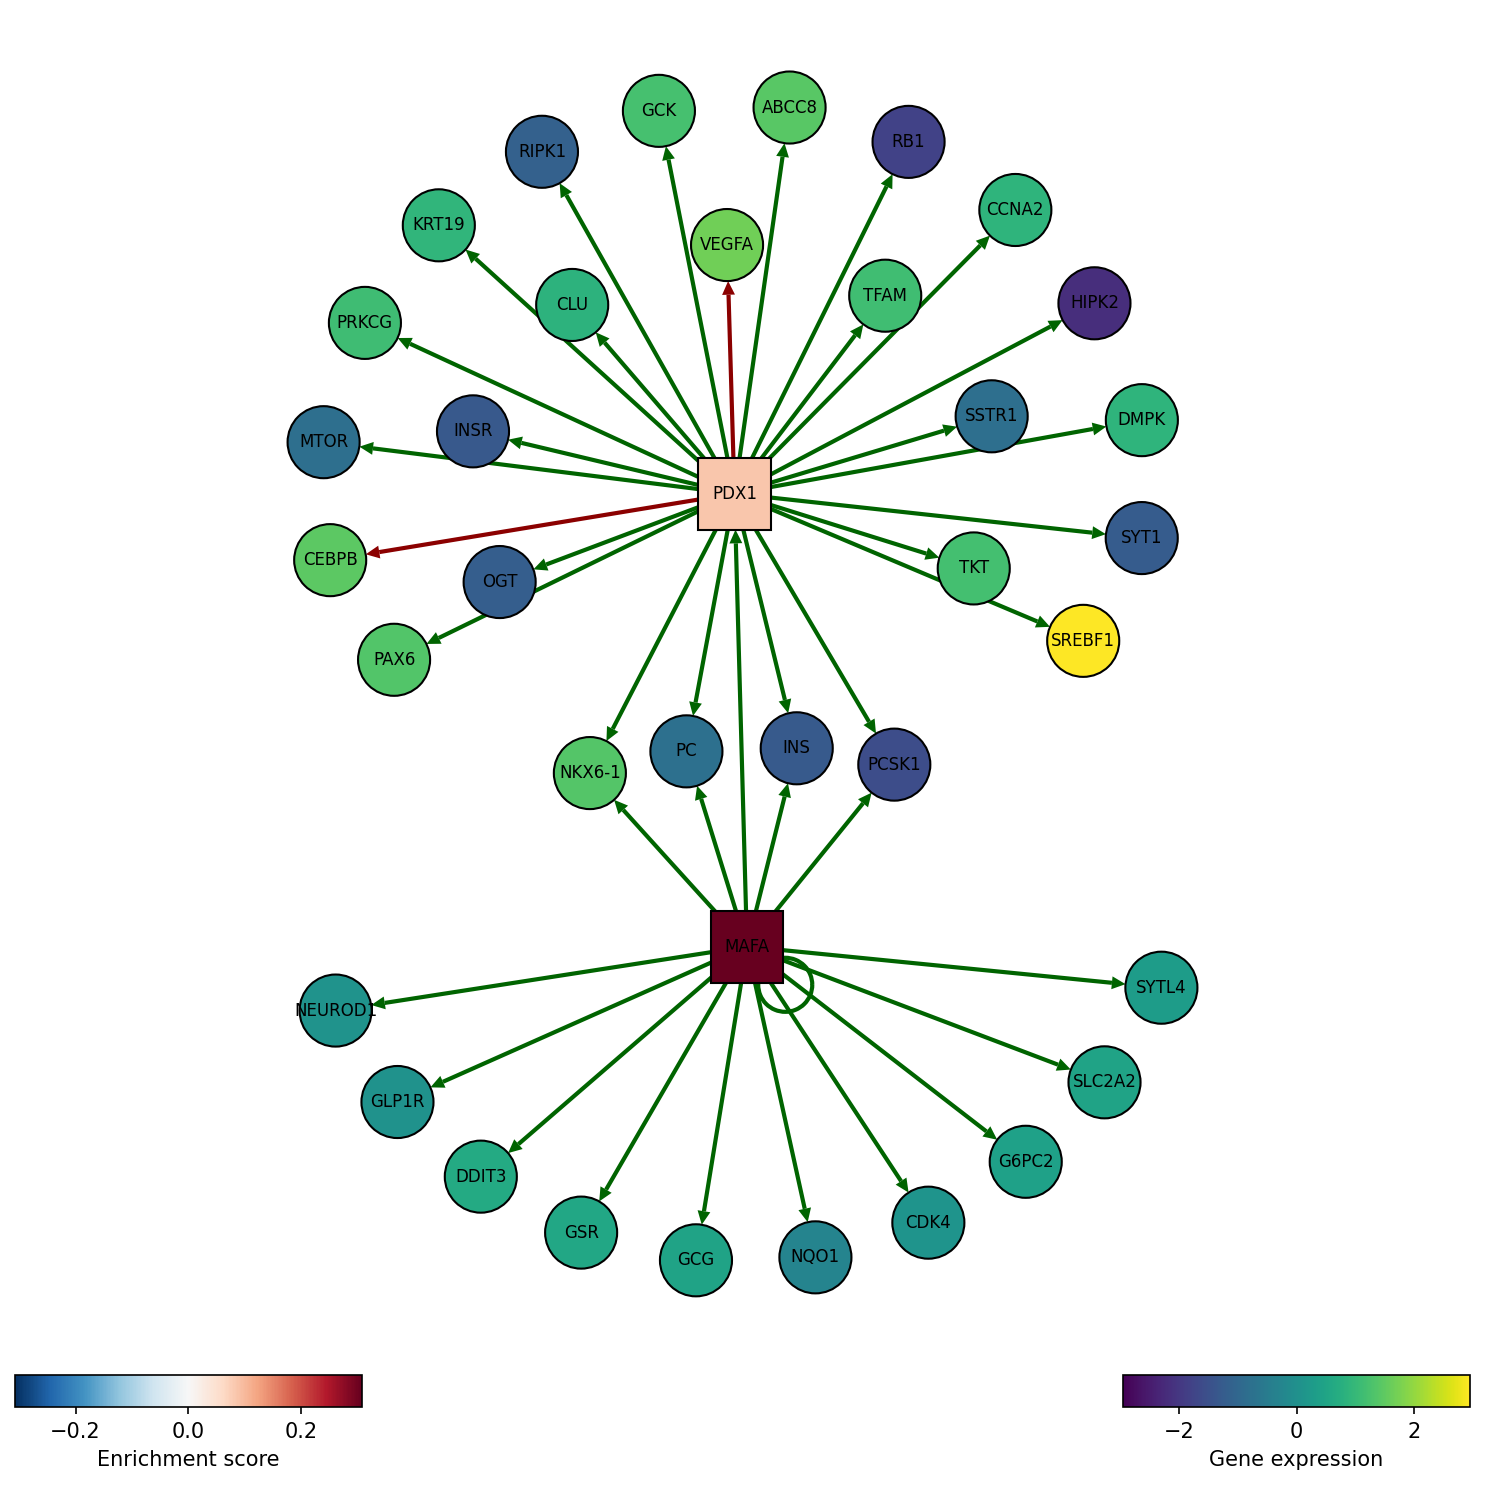

In [37]:
dc.plot_network(
    net=collectri,
    obs=mat,
    act=tf_acts,
    n_sources=["PDX1", "MAFA"],
    n_targets=25,
    node_size=0.5,
    label_size=8,
    figsize=(10, 10),
    c_pos_w='darkgreen',
    c_neg_w='darkred',
    vcenter=True,
    save = '../figures/direct/Control_WT_02/plot_networks.png'
)

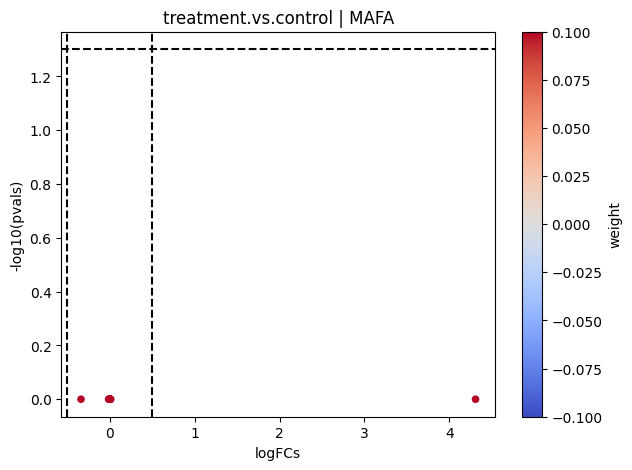

In [38]:
# Extract logFCs and pvals
logFCs = results_df[['log2FoldChange']].T.rename(index={'log2FoldChange': 'treatment.vs.control'})
pvals = results_df[['padj']].T.rename(index={'padj': 'treatment.vs.control'})

# Plot
dc.plot_volcano(logFCs, pvals, 'treatment.vs.control', name='MAFA', net=collectri, top=10, sign_thr=0.05, lFCs_thr=0.5)

### Pathway activity inference

In [39]:
# Retrieve PROGENy model weights
progeny = dc.get_progeny(top=500)
progeny

/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,source,target,weight,p_value
0,Androgen,TMPRSS2,11.490631,0.000000e+00
1,Androgen,NKX3-1,10.622551,2.242078e-44
2,Androgen,MBOAT2,10.472733,4.624285e-44
3,Androgen,KLK2,10.176186,1.944414e-40
4,Androgen,SARG,11.386852,2.790209e-40
...,...,...,...,...
6995,p53,ZMYM4,-2.325752,1.522388e-06
6996,p53,CFDP1,-1.628168,1.526045e-06
6997,p53,VPS37D,2.309503,1.537098e-06
6998,p53,TEDC1,-2.274823,1.547037e-06


### Activity inference with multivariate Linear Model (MLM)

In [40]:
# Infer pathway activities with mlm
pathway_acts, pathway_pvals = dc.run_mlm(mat=mat, net=progeny, verbose=True)
pathway_acts.index=['Activity_score']
pathway_pvals.index=['pval']
pathway_all = pd.concat([pathway_acts, pathway_pvals])
pathway_all

Running mlm on mat with 1 samples and 15620 targets for 14 sources.


,Androgen,EGFR,Estrogen,Hypoxia,JAK-STAT,MAPK,NFkB,PI3K,TGFb,TNFa,Trail,VEGF,WNT,p53
Activity_score,-0.986707,2.327413,0.824126,-2.223845,-2.564869,-1.327341,0.906131,-4.978230e+00,-1.157118,-0.500800,1.005743,-0.760094,0.948082,0.505496
pval,0.323802,0.019956,0.409881,0.026173,0.010331,0.184415,0.364881,6.485270e-07,0.247242,0.616519,0.314555,0.447210,0.343102,0.613218


In [41]:
pathway_all=pathway_all.T.sort_values(by="Activity_score", ascending=False)
pathway_all.to_csv('../figures/direct/Control_WT_02/top_pathways.csv')
pathway_all

,Activity_score,pval
EGFR,2.327413,1.995603e-02
Trail,1.005743,3.145547e-01
WNT,0.948082,3.431023e-01
NFkB,0.906131,3.648807e-01
Estrogen,0.824126,4.098806e-01
p53,0.505496,6.132180e-01
TNFa,-0.500800,6.165191e-01
VEGF,-0.760094,4.472099e-01
Androgen,-0.986707,3.238017e-01
TGFb,-1.157118,2.472419e-01


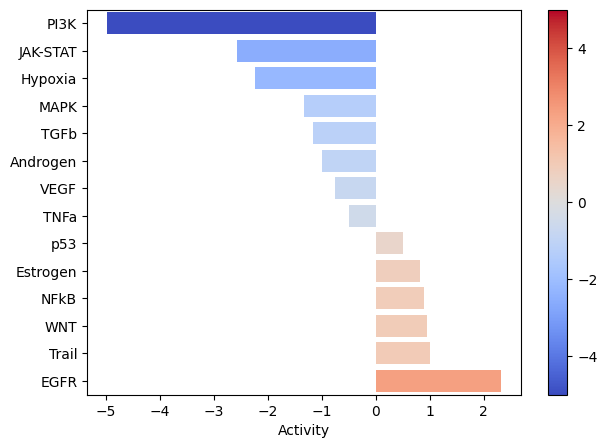

In [42]:
pathway_acts.index=['treatment.vs.control']
dc.plot_barplot(
    pathway_acts,
    'treatment.vs.control',
    top=25,
    vertical=True,
    vmin=-5,
    vmax=5,
    save='../figures/direct/Control_WT_02/pathway_activities.png'
)

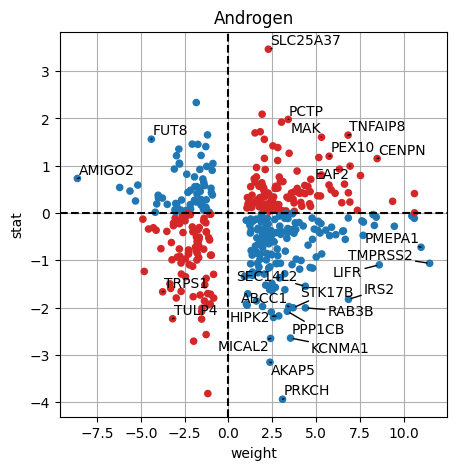

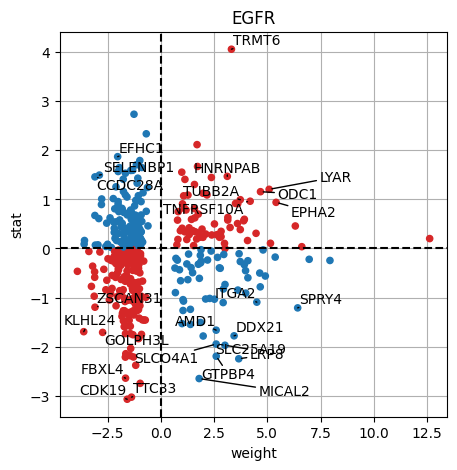

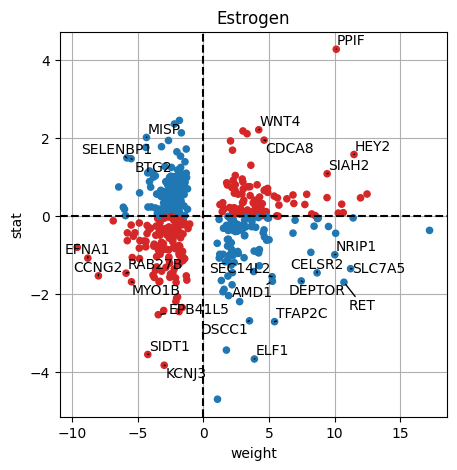

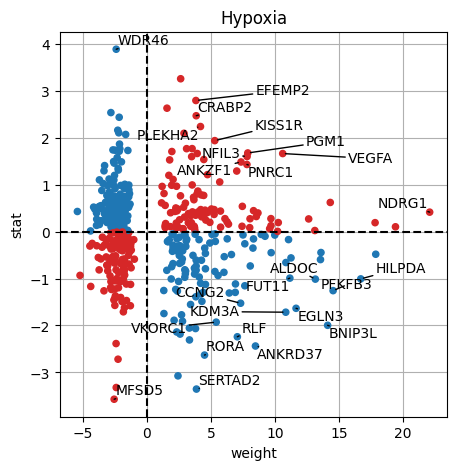

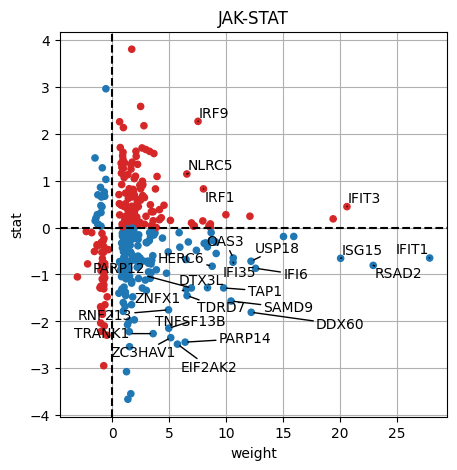

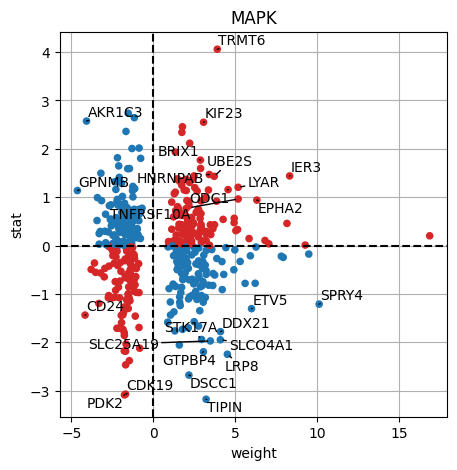

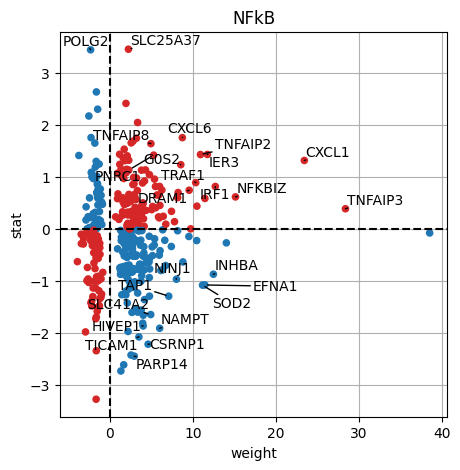

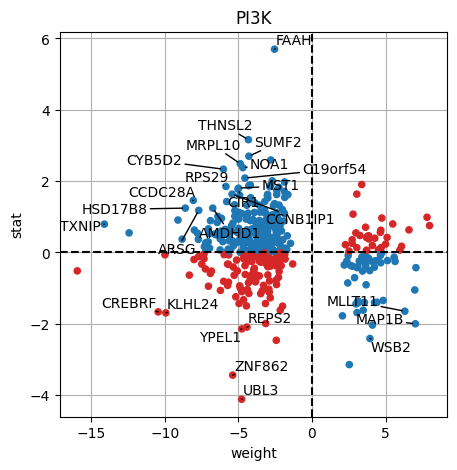

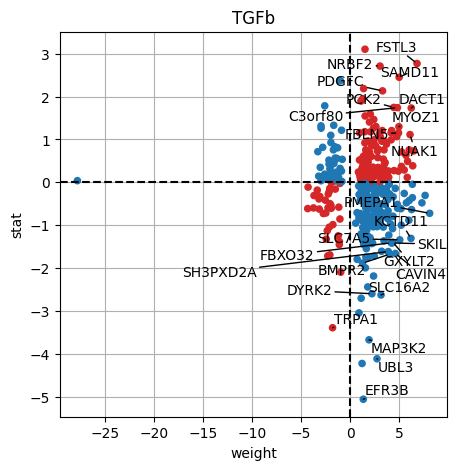

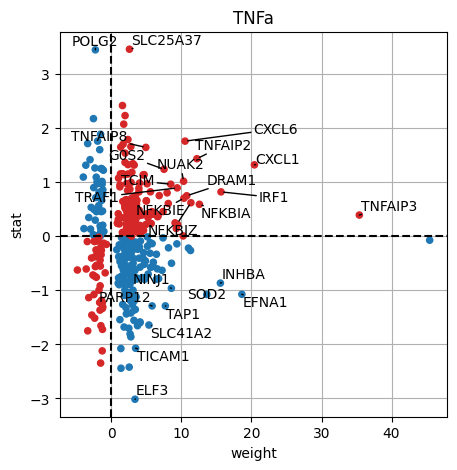

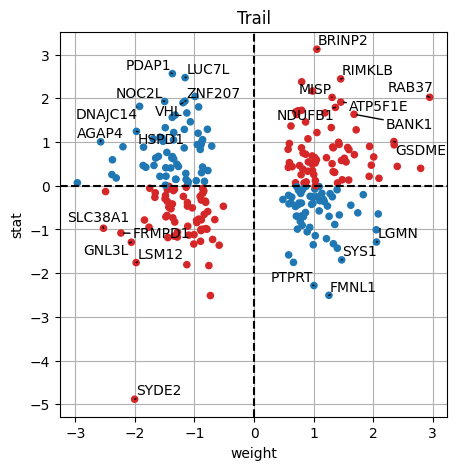

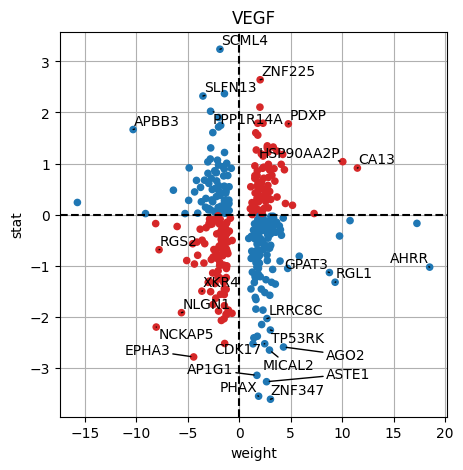

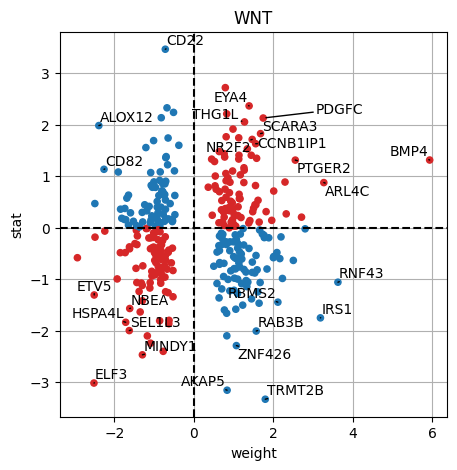

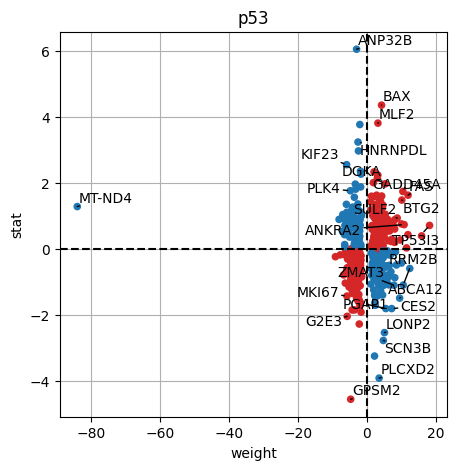

In [43]:
#Plot Targets for all pathways
for pathway in pathway_acts:
    dc.plot_targets(results_df, stat='stat', source_name=pathway, net=progeny, top=25, save=f'../figures/direct/Control_WT_02/{pathway}_targets.png')


### Funtional enrichment of Biological Terms

In [44]:
# # The Molecular Signatures Database (MSigDB) is a resource containing a collection of gene sets annotated to different biological processes.
# msigdb = dc.get_resource('MSigDB')
# msigdb

In [45]:
# msigdb['collection'].unique()

In [46]:
# # Filter by hallmark
# msigdb = msigdb[msigdb['collection']=='hallmark']

# # Remove duplicated entries
# msigdb = msigdb[~msigdb.duplicated(['geneset', 'genesymbol'])]

# # Rename
# msigdb.loc[:, 'geneset'] = [name.split('HALLMARK_')[1] for name in msigdb['geneset']]

# msigdb